In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout,ZeroPadding2D,BatchNormalization
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
print("GPU Available: ", tf.test.is_gpu_available()) 
print(tf.__version__)


GPU Available:  True
1.14.0


## Data preparation

In [2]:
test_data_dir='C:/workspaceWin/DataScience/learnTensorflow/dog-cat-full-dataset-master/data/test'
train_data_dir='C:/workspaceWin/DataScience/learnTensorflow/dog-cat-full-dataset-master/data/train'

In [3]:
img_width=32
img_height=32
batch_size=20

In [4]:
datagen=ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = datagen.flow_from_directory(directory=train_data_dir,
                                              target_size=(img_width,img_height),
                                              classes=['dogs','cats'],
                                              class_mode='binary',
                                              batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [6]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
test_generator = datagen.flow_from_directory(directory=test_data_dir,
                                              target_size=(img_width,img_height),
                                              classes=['dogs','cats'],
                                              class_mode='binary',
                                              batch_size=batch_size)

Found 5000 images belonging to 2 classes.


In [8]:
len(train_generator)     #nb of batches

1000

## Build a simple model

In [9]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
history=model.fit_generator(generator=train_generator,
                            steps_per_epoch=len(train_generator),
                            epochs=5,
                            validation_data=test_generator,
                            validation_steps=len(test_generator),
                            verbose=1)

Epoch 1/5
1000/1000 [==============================] - 56s 56ms/step - loss: 0.6944 - acc: 0.5081 - val_loss: 0.6933 - val_acc: 0.5002
Epoch 2/5
1000/1000 [==============================] - 47s 47ms/step - loss: 0.6920 - acc: 0.5102 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 3/5
1000/1000 [==============================] - 47s 47ms/step - loss: 0.6893 - acc: 0.5213 - val_loss: 0.6657 - val_acc: 0.6008
Epoch 4/5
1000/1000 [==============================] - 48s 48ms/step - loss: 0.6574 - acc: 0.5827 - val_loss: 0.6177 - val_acc: 0.6696
Epoch 5/5
1000/1000 [==============================] - 47s 47ms/step - loss: 0.5576 - acc: 0.7100 - val_loss: 0.5422 - val_acc: 0.7200


In [12]:
history.history

{'loss': [0.6943941857814789,
  0.6920464534163475,
  0.6892835242152214,
  0.6574376314878464,
  0.557564945012331],
 'acc': [0.50805, 0.51025, 0.5213, 0.58265, 0.71005],
 'val_loss': [0.6933029487133026,
  0.6933416085243225,
  0.6656620519161225,
  0.6176686079502106,
  0.5421508238315582],
 'val_acc': [0.5002, 0.5, 0.6008, 0.6696, 0.72]}

In [15]:
def plot_learning_curve(history):
    epoch_range=range(1,6)
    plt.plot(epoch_range,history.history['acc'])
    plt.plot(epoch_range,history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

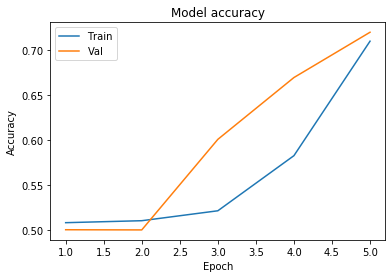

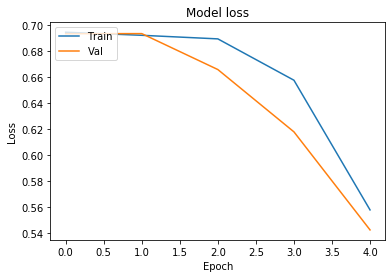

In [16]:
plot_learning_curve(history)

## Implement first 3 blocks of VGG16

In [18]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(1,activation='sigmoid'))

In [19]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit_generator(generator=train_generator,
                            steps_per_epoch=len(train_generator),
                            epochs=5,
                            validation_data=test_generator,
                            validation_steps=len(test_generator),
                            verbose=1)

Epoch 1/5
1000/1000 [==============================] - 48s 48ms/step - loss: 0.6205 - acc: 0.6503 - val_loss: 0.5391 - val_acc: 0.7284
Epoch 2/5
1000/1000 [==============================] - 48s 48ms/step - loss: 0.5117 - acc: 0.7498 - val_loss: 0.4748 - val_acc: 0.7696
Epoch 3/5
1000/1000 [==============================] - 48s 48ms/step - loss: 0.4508 - acc: 0.7885 - val_loss: 0.4368 - val_acc: 0.7996
Epoch 4/5
1000/1000 [==============================] - 47s 47ms/step - loss: 0.4044 - acc: 0.8148 - val_loss: 0.4308 - val_acc: 0.8018
Epoch 5/5
1000/1000 [==============================] - 48s 48ms/step - loss: 0.3584 - acc: 0.8388 - val_loss: 0.4665 - val_acc: 0.7752


## Use Dropout and Batch normalization

In [21]:
model = Sequential()

# Conv2D：输入三维数据(如：平面RGB图像=h*w*3,平面灰度图像=h*w*1)，卷积为三维：3*3*channels, (RGB:channel=3 灰度图:channel=1)
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [22]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history=model.fit_generator(generator=train_generator,
                            steps_per_epoch=len(train_generator),
                            epochs=10,
                            validation_data=test_generator,
                            validation_steps=len(test_generator),
                            verbose=1)

Epoch 1/10
1000/1000 [==============================] - 49s 49ms/step - loss: 0.6192 - acc: 0.6678 - val_loss: 0.6114 - val_acc: 0.6620
Epoch 2/10
1000/1000 [==============================] - 49s 49ms/step - loss: 0.5426 - acc: 0.7268 - val_loss: 0.6514 - val_acc: 0.6574
Epoch 3/10
1000/1000 [==============================] - 50s 50ms/step - loss: 0.4990 - acc: 0.7598 - val_loss: 0.4993 - val_acc: 0.7604
Epoch 4/10
1000/1000 [==============================] - 49s 49ms/step - loss: 0.4617 - acc: 0.7798 - val_loss: 0.4346 - val_acc: 0.7952
Epoch 5/10
1000/1000 [==============================] - 49s 49ms/step - loss: 0.4423 - acc: 0.7934 - val_loss: 0.4217 - val_acc: 0.8050
Epoch 6/10
1000/1000 [==============================] - 48s 48ms/step - loss: 0.4168 - acc: 0.8102 - val_loss: 0.4296 - val_acc: 0.8088
Epoch 7/10
1000/1000 [==============================] - 49s 49ms/step - loss: 0.3951 - acc: 0.8210 - val_loss: 0.4955 - val_acc: 0.7612
Epoch 8/10
1000/1000 [==========================

In [27]:
def plot_learning_curve(history,epoch):
    epoch_range=range(1,epoch+1)
    plt.plot(epoch_range,history.history['acc'])
    plt.plot(epoch_range,history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='upper left')
    plt.show()

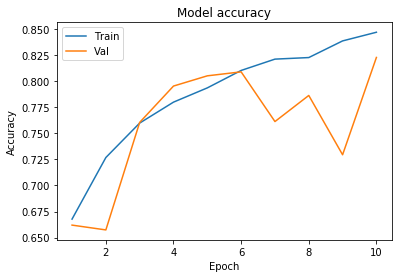

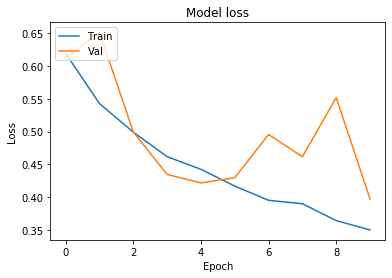

In [29]:
plot_learning_curve(history,10)